# Linear regression


In [23]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

### Uniform Distribution

In [24]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [25]:
n_trials= 10000
samples=[]
for counter in range(1,n_trials):
    samples.append(np.random.choice(np.arange(1,7)))
#samples

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

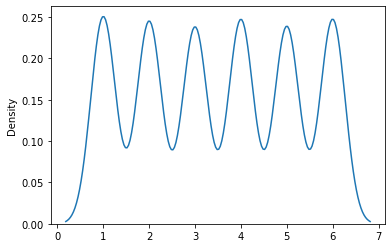

In [26]:
#sns.distplot(samples,hist=True)#sns.histplot(samples)

sns.distplot(samples,hist=False)

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


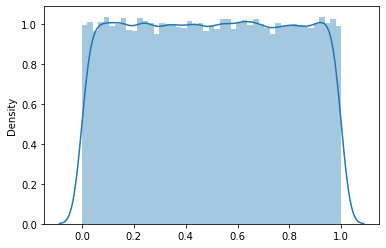

In [27]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.uniform(size=100000), hist=True)

plt.show()

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


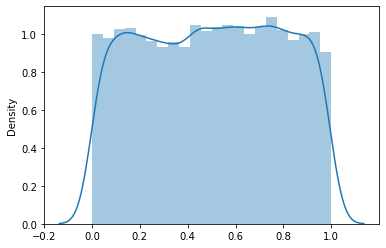

In [28]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.uniform(size=10000), hist=True)

plt.show()

### Probability density estimation

In [29]:
# generate a sample
sample = random.normal(loc=50, scale=5, size=1000)
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=50.272, Standard Deviation=4.848


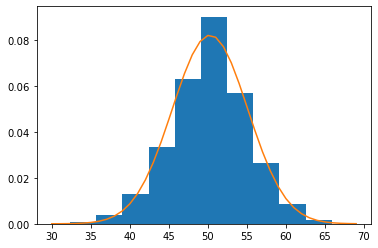

In [33]:
# define the distribution
dist = sc.stats.norm(sample_mean, sample_std)

# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

In [35]:
sc.stats.lognorm.rvs(loc=0,scale=1,s=1000)

5.279310536194814e-164

## Data Trasnformations

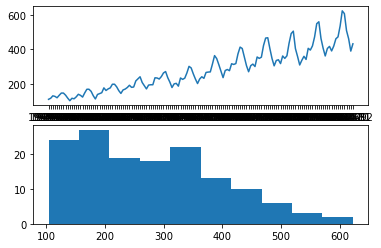

In [37]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('res/airline-passengers.csv', header=0, index_col=0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

### Square Root Transform

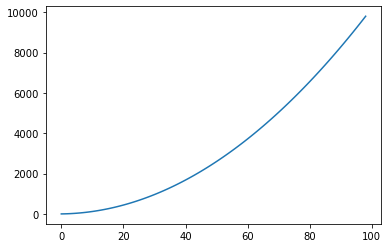

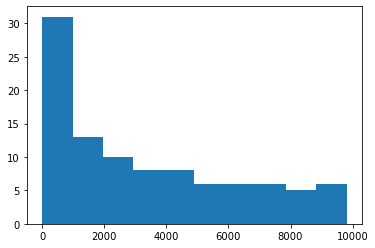

In [38]:
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
# line plot
pyplot.plot(series)
pyplot.show()
# histogram
pyplot.hist(series)
pyplot.show()

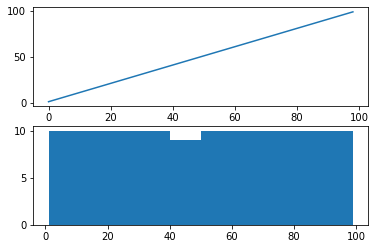

In [39]:
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

#### Square root transform Airpassengers

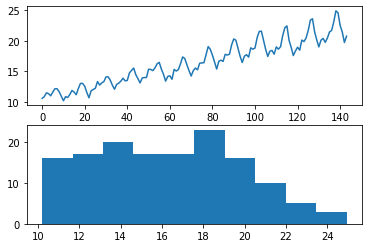

In [41]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('res/airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Log Transform

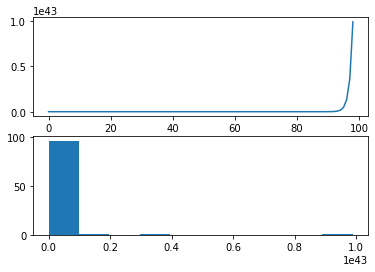

In [42]:
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

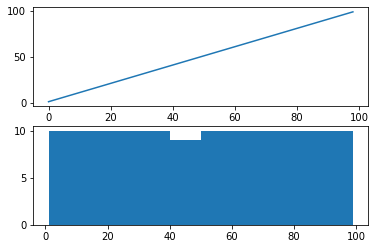

In [43]:
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

### Log Trasnform Air passengers

Hint: It is important to note that this operation assumes values are positive and non-zero.

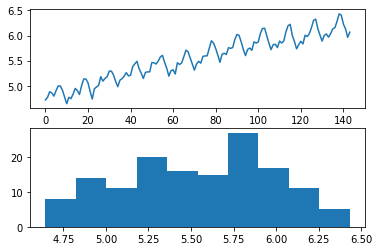

In [45]:
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('res/airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Box-Cox Transform
The square root transform and log transform belong to a class of transforms called power transforms.

lambda = -1. is a reciprocal transform.
lambda = -0.5 is a reciprocal square root transform.
lambda = 0.0 is a log transform.
lambda = 0.5 is a square root transform.
lambda = 1.0 is no transform.

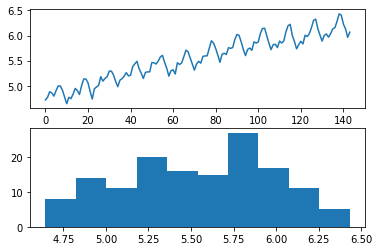

In [51]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('res/airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Auto Lambda for BOX cox

Lambda: 0.148023


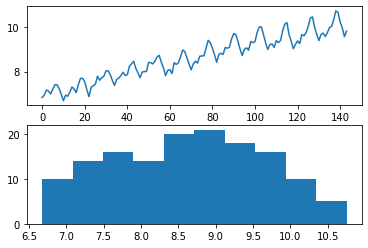

In [52]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('res/airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Kernel Density function for Bimodal data

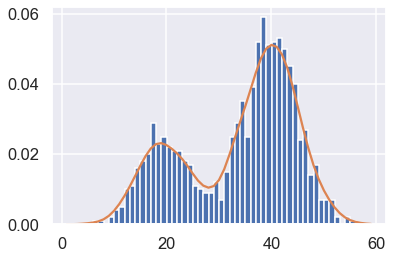

In [135]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

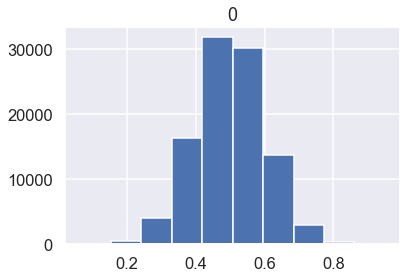

In [30]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 100000)
np.mean(s)
s
pd.DataFrame(s).hist()

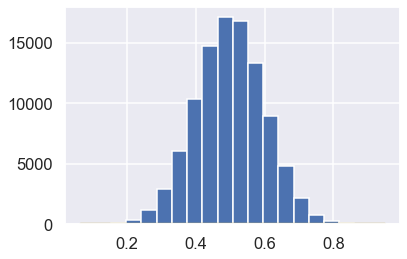

In [162]:
# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

### MinMax Scaler

In [53]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))

MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [54]:
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

### Standard Scaler (Normalization)

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [55]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))
#scaler.fit_transform(data) # you can put the formula directly together

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [58]:
#@title Interactive plot
sns.set()
sns.set_context("talk")


def plot_regression(slope, intercept):
    # Fixing the seed of the random number generator for reproducibility of the fake data
    np.random.seed(50)
    x = np.arange(1, 101)
    y = 3 * x + 20 + np.random.normal(0, 30, 100)
    y_pred = slope * x + intercept
    mse = np.mean((y-y_pred)**2)
    plt.plot(x, y, "o")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot with the regression line")

    # We define two points to construct the line. Every line is defined by two points.
    x1, y1 = 0, intercept
    x2, y2 = 100, intercept + slope * 100
    l1 = [(x1, y1), (x2,y2)]
    
    lc = LineCollection([l1], color=["black"], lw=2)

    plt.gca().add_collection(lc)

    plt.show()
    
    print("The mean squared error (MSE) is: {:.2f} cm2".format(mse))
    print("The root mean square (RMSE) is: {:.2f} cm".format(np.sqrt(mse)))
    
#interactive_plot = interactive(plot_regression, alpha=(0,30), beta=(-100,100))
interactive_plot = interactive(plot_regression, slope=widgets.FloatSlider(min=0, max=40, step=0.5, value=0), 
                               intercept=widgets.FloatSlider(min=0, max=200, step=10, value=200))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=40.0, step=0.5), FloatSlider(value=200.0…

## Obtaining the model with Ordinary Least Squares

Let's type the equations with python

Values needed:

* $\bar{x}$
* $\bar{y}$
* $\bar{xy}$
* $\bar{x}^{2}$
* $\bar{x^{2}}$

$ \hat{y_{i}}=a+b*x_{i} $

$a = \bar{y} - \bar{x}\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$

$b=\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$


In [59]:
# Replicating the data
np.random.seed(50)
x = np.arange(1, 101)
y = 3 * x + 20 + np.random.normal(0, 30, 100)

In [60]:
# Slope
b = ( np.mean(x*y) - (np.mean(x)*np.mean(y)) ) / ( np.mean(x*x) - np.mean(x)**2 )
# Intercept
a = np.mean(y) - np.mean(x)*b

print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Making predictions

In [61]:
# Prediction for new data (drop diameter = 41)
print("The prediction for {} is {:.2f}".format(41,a + b * 41))

The prediction for 41 is 144.94


In [62]:
# Prediction for new data (drop diameter = 20)
print("The prediction for {} is {:.2f}".format(21,a + b * 21))

The prediction for 21 is 86.49


### Evaluating predictions

In [63]:
# Evaluating predictions
y_pred = a + b * x

# Compute:
# ME: mean error
MSE = np.mean( y - y_pred )

# MAE: mean absolute error
MAE = np.mean( np.abs( y - y_pred ) )

# MSE: mean squared error
MSE = np.mean( np.power( y - y_pred , 2 ) )

# RMSE: root mean squared error
RMSE = np.sqrt(MSE)

# MAPE: mean absolute percentual error
MAPE = np.mean( np.abs( y - y_pred) / y ) 

Text(0.5, 1.0, 'Residual histogram')

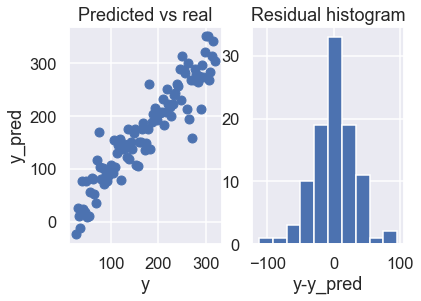

In [64]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# An stright line

fig, ax = plt.subplots(1,2)
ax[0].plot(y_pred, y, 'o')
ax[0].set_xlabel("y")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# It resembles a normal distribution?
ax[1].hist(y - y_pred)
ax[1].set_xlabel("y-y_pred")
ax[1].set_title("Residual histogram")



### Plotting the linear model with seaborn

In [65]:
data = pd.DataFrame({"x":x, "y":y,"y_pred":y_pred})
data

,x,y,y_pred
0,1,-23.810563,28.036424
1,2,25.070672,30.958945
2,3,10.372147,33.881467
3,4,-11.937415,36.803988
4,5,77.358384,39.726509
...,...,...,...
95,96,268.796797,305.675960
96,97,284.306951,308.598482
97,98,314.158032,311.521003
98,99,342.992746,314.443524


<AxesSubplot:xlabel='y', ylabel='y_pred'>

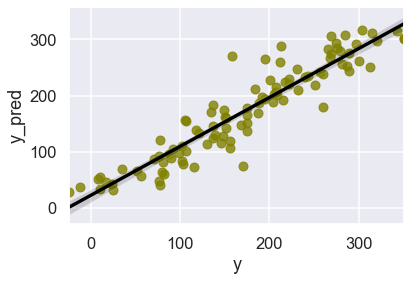

In [66]:
# sns.regplot(x =, y = , data=, scatter_kws ={'color': value}, line_kws={"color": "red"})
sns.regplot(x='y',y='y_pred', data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

## Linear regression with scipy

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

In [67]:
import scipy.stats as stats
# slope, intercept, r_value, p_value, slope_std_err, intercept_std_error = stats.linregress(x,y); where x,y are numpy arrays
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

result = stats.linregress(x,y)

print("The slope of the regression is: {:.2f}".format(result.slope))
print("The intercept of the regression is: {:.2f}".format(result.intercept))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


### Linear model with Scikit-Learn

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
# create the model
# linear_model.LinearRegression()

model = LinearRegression()

In [70]:
x.shape

(100,)

In [71]:
y.shape

(100,)

In [72]:
# fit the model
reg = model.fit(x.reshape(-1,1),y.reshape(-1,1))

print("The slope of the regression is: {:.2f}".format(reg.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg.intercept_[0]))

The slope of the regression is: 2.92
The intercept of the regression is: 25.11


In [73]:
# make predictions
pred = model.predict(np.array([41, 21]).reshape(-1,1))
pred

array([[144.93728112],
       [ 86.4868524 ]])

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# The coefficient of determination: 1 is perfect prediction
print("The R2 is {:.2f}".format(r2_score(y,y_pred)))

The R2 is 0.87


# Data splitting

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Compute again the values of the slope and the intercept.
# How do they compare with the previous values?
reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

print("The slope of the regression is: {:.2f}".format(reg_new.coef_[0][0]))
print("The intercept of the regression is: {:.2f}".format(reg_new.intercept_[0]))

The slope of the regression is: 2.93
The intercept of the regression is: 24.23


In [77]:
# Now repeat this 100 times and get the corresponding values for the slope and the intercept point estimations!
# Store the resulting values in two lists:

slopes = []
intercepts = []

for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

    reg_new = model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

    slopes.append(reg_new.coef_[0][0])
    intercepts.append(reg_new.intercept_[0])


Text(0.5, 1.0, 'Histogram of intercepts')

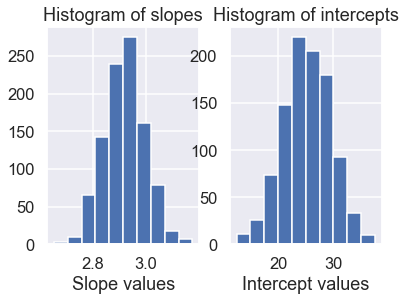

In [78]:
# Plot histograms for the slopes and the intercepts.

fig2, ax2 = plt.subplots(1,2)

ax2[0].hist(slopes)
ax2[0].set_xlabel("Slope values")
ax2[0].set_title("Histogram of slopes")

ax2[1].hist(intercepts)
ax2[1].set_xlabel("Intercept values")
ax2[1].set_title("Histogram of intercepts")


# Confidence intervals

Every sample for the training set we will produce another set of predicted regression coefficient. Therefore, we can ask ourselves to have a confidence interval for those coefficients. If we set 

$$\hat{y}_{i}=\hat{b}_{0}+\hat{b}_{1}x_{i}$$

A confidence interval for each coefficient can be computed as:

$$\hat{b}_{1} \pm t_{\alpha /2,n - p}* \left(\sqrt{\frac{MSE}{\sum_{i}(x_{i}-\bar{x})^{2}}}\right)$$

and 

$$\hat{b}_{0} \pm t_{\alpha /2,n - p} * \left(\sqrt{\frac{MSE}{n}}\right)$$

[see](https://online.stat.psu.edu/stat415/lesson/7/7.5)

In [79]:
# Compute the confidence intervals for the slope and the intercept
# stats.t.ppf(1-(alpha/2),df=n-2)

tc = stats.t.ppf(1-(0.05/2),df=x.shape[0]-2)

c1 =  np.sqrt( MSE / np.sum( np.power( x - np.mean(x), 2) ) )
c2 = np.sqrt( MSE / x.shape[0] )

print("The confidence interval for the slope is [{:.2f}, {:.2f}]".format(b - tc * c1, b + tc * c1))
print("The confidence interval for the intercept is [{:.2f}, {:.2f}]".format(a - tc * c2, a + tc * c2))

The confidence interval for the slope is [2.70, 3.14]
The confidence interval for the intercept is [18.72, 31.51]


Referecnes: some examples taken from https://machinelearningmastery.com/ 